# Bài 3.4. Xây dựng mô hình Naive ngây thơ trên tập dữ liệu Mushroom.

## 1. Xây dựng mô hình Naive Bayes

### 1.1. Khai báo các thư viện cần thiết

In [17]:
# Import libraries
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import export_graphviz
import graphviz


### 1.2. Đọc dữ liệu 

In [3]:
df = pd.read_csv('../data/mushrooms.csv')
display(df.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 1.3. Khám phá dữ liệu

In [4]:
df.shape

(8124, 23)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [12]:
df[df.duplicated()].shape

(0, 23)

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### 1.4. Tiền xử lý dữ liệu

In [6]:
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

### 1.5. Chia dữ liệu

In [7]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.6. Xây dựng mô hình Naive Bayes

In [8]:
model = CategoricalNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


### 1.7. Đánh giá mô hình

In [9]:
y_pred = model.predict(X_test)

print(" Độ chính xác:", accuracy_score(y_test, y_pred))
print("\n Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
print("\n Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

 Độ chính xác: 0.9458572600492207

 Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1257
           1       1.00      0.89      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438


 Ma trận nhầm lẫn:
[[1252    5]
 [ 127 1054]]


### 1.8. Độ quan trọng đặc trưng

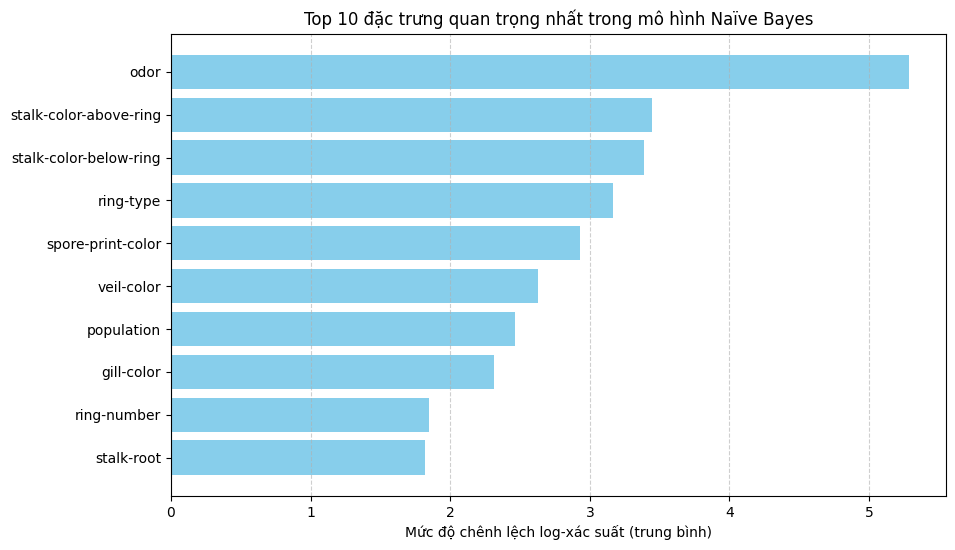

In [10]:
importance = []
for i, col in enumerate(X.columns):
    diff = np.abs(model.feature_log_prob_[i][0] - model.feature_log_prob_[i][1])
    importance.append(diff.mean())

feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
# ---- Lấy Top 10 đặc trưng quan trọng nhất ----
top_features = feat_imp.head(10)

# ---- Vẽ biểu đồ ----
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # đảo chiều để đặc trưng quan trọng nhất nằm trên
plt.xlabel('Mức độ chênh lệch log-xác suất (trung bình)')
plt.title('Top 10 đặc trưng quan trọng nhất trong mô hình Naïve Bayes')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()